<a href="https://colab.research.google.com/github/mmiefm1/Project-3/blob/main/Project3_DataScience_job_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports


In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [ ]:
# 2. Load Dataset
df = pd.read_csv("ds_salaries.csv")
print("Dataset Loaded Successfully!")
df.head()

# 3. Basic Info
print("Shape:", df.shape)
df.info()
df.describe()

Dataset Loaded Successfully!
Shape: (607, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
# 4. Check for nulls & duplicates
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values:
 Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Duplicate rows: 0


In [ ]:
# 5. Value Counts & Unique Checks
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print("Unique:", df[col].nunique())


Column: Unnamed: 0
Unnamed: 0
606    1
0      1
1      1
2      1
3      1
      ..
34     1
35     1
36     1
37     1
38     1
Name: count, Length: 607, dtype: int64
Unique: 607

Column: work_year
work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64
Unique: 3

Column: experience_level
experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64
Unique: 4

Column: employment_type
employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64
Unique: 4

Column: job_title
job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Scie

### Exploratory Data Analysis (EDA)

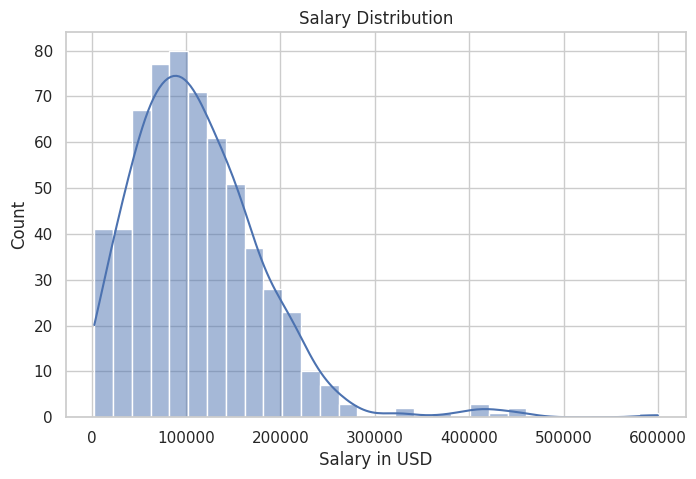

In [ ]:
# 6. Univariate Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.show()

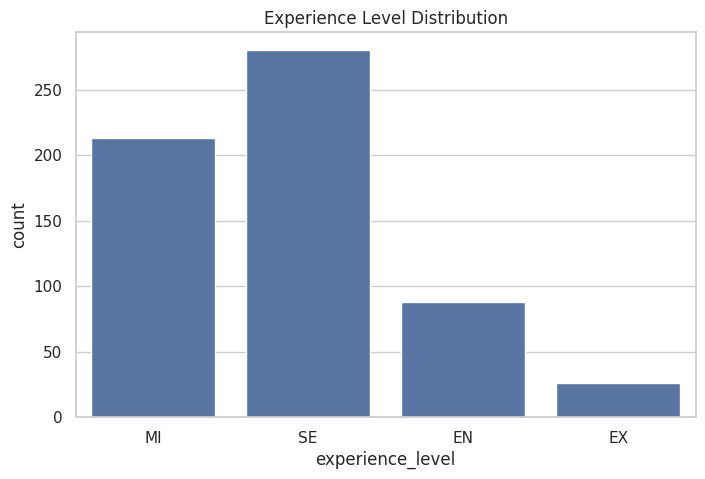

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='experience_level')
plt.title('Experience Level Distribution')
plt.show()


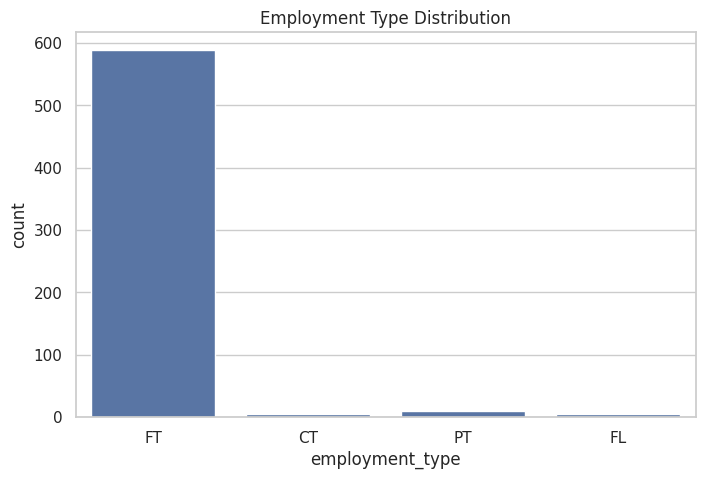

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='employment_type')
plt.title('Employment Type Distribution')
plt.show()


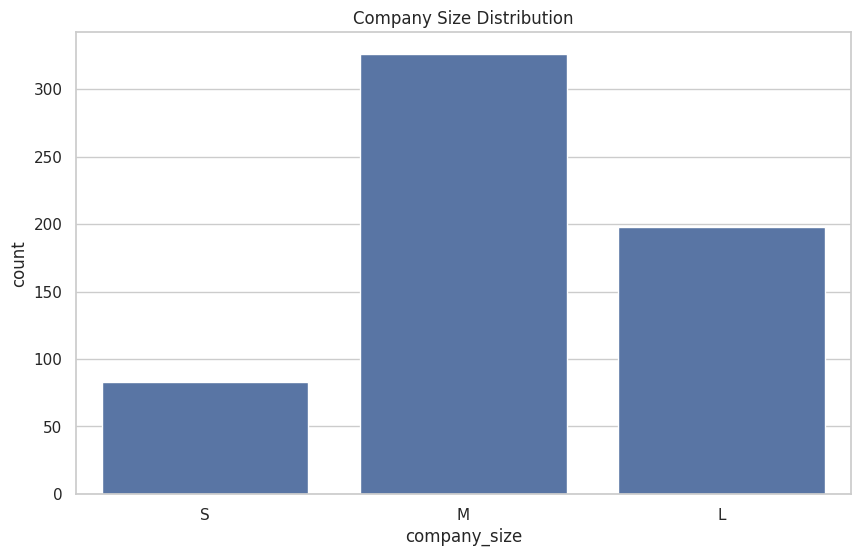

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='company_size', order=['S', 'M', 'L'])
plt.title('Company Size Distribution')
plt.show()

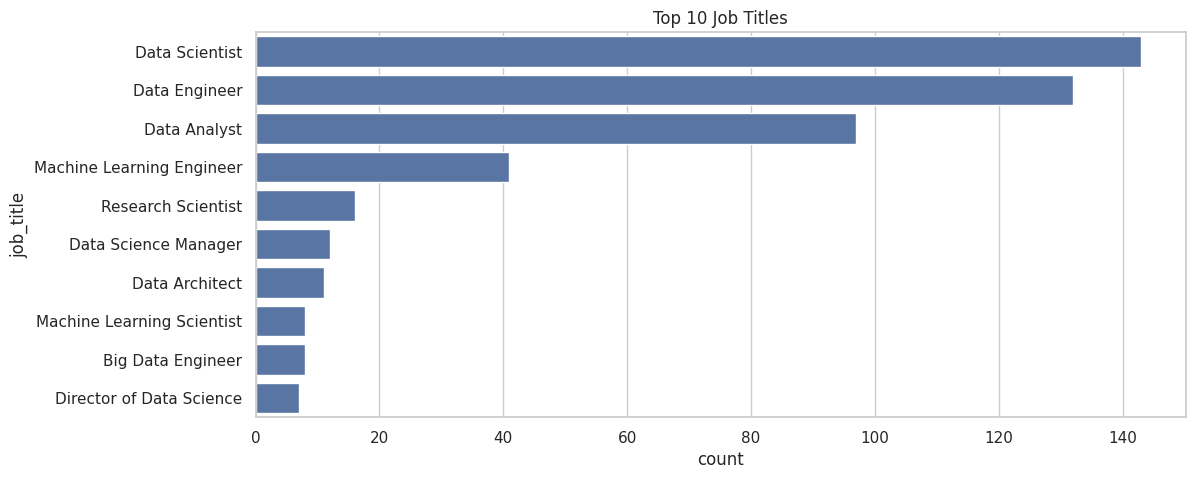

In [ ]:
# 7. Top Job Titles
plt.figure(figsize=(12,5))
sns.countplot(y=df['job_title'], order=df['job_title'].value_counts().index[:10])
plt.title("Top 10 Job Titles")
plt.show()

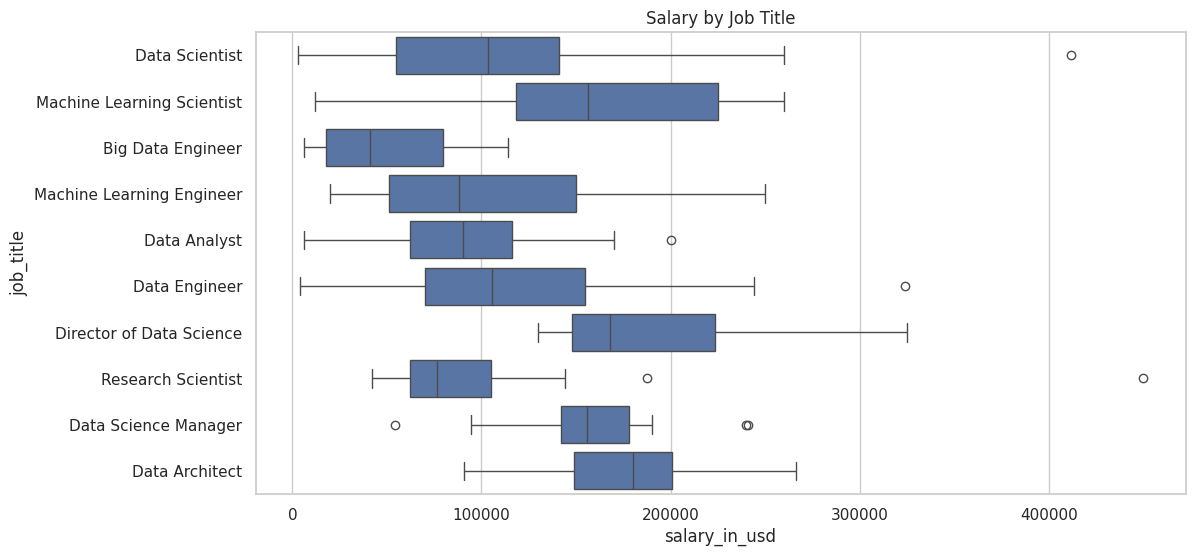

In [ ]:
# 8. Salary by Job Title
plt.figure(figsize=(12,6))
sns.boxplot(y='job_title', x='salary_in_usd', data=df[df['job_title'].isin(df['job_title'].value_counts().index[:10])])
plt.title("Salary by Job Title")
plt.show()

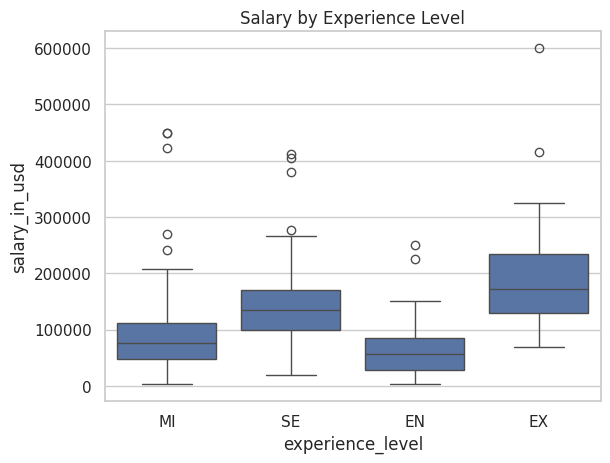

In [ ]:
# 9. Salary by Experience
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title("Salary by Experience Level")
plt.show()

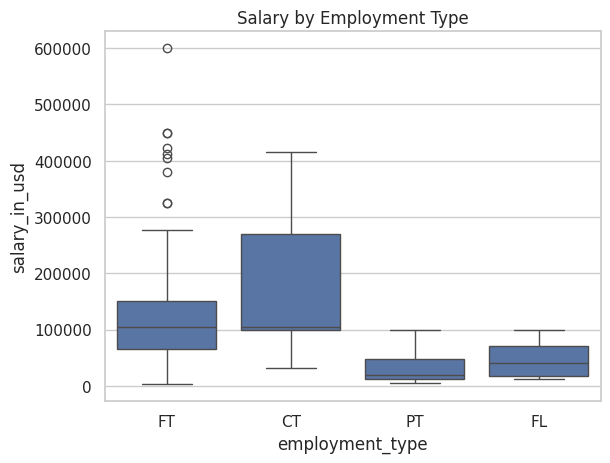

In [ ]:
# 10. Salary by Employment Type
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title("Salary by Employment Type")
plt.show()

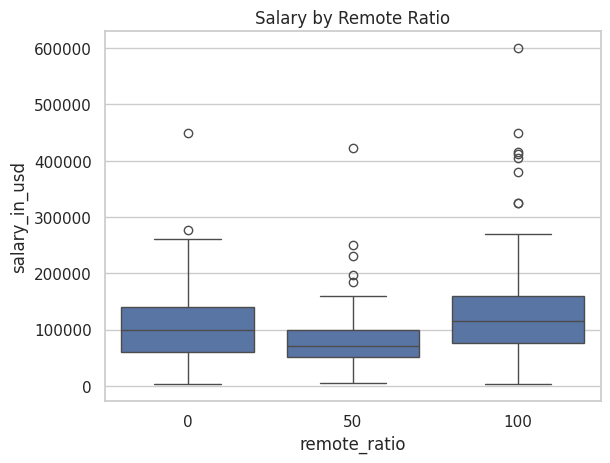

In [ ]:
# 11. Salary by Remote Ratio
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title("Salary by Remote Ratio")
plt.show()


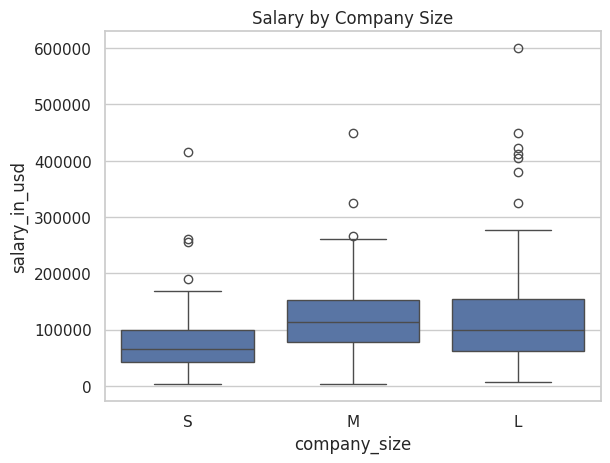

In [ ]:
# 12. Salary by Company Size
sns.boxplot(x='company_size', y='salary_in_usd', data=df, order=['S', 'M', 'L'])
plt.title("Salary by Company Size")
plt.show()


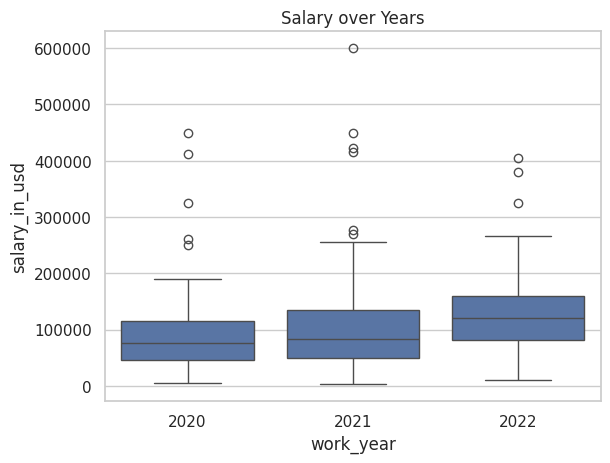

In [ ]:
# 13. Salary by Year
sns.boxplot(x='work_year', y='salary_in_usd', data=df)
plt.title("Salary over Years")
plt.show()


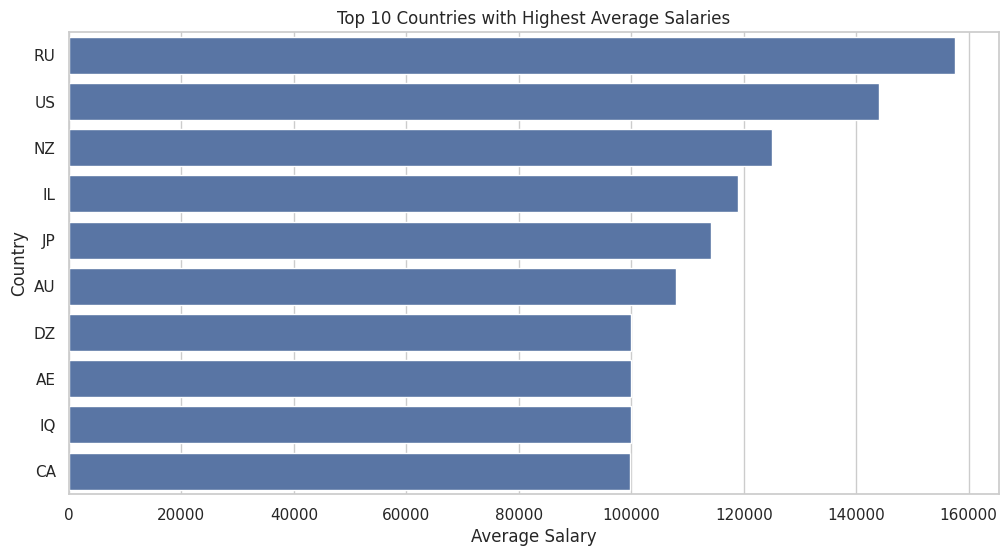

In [ ]:
# 14. Country-wise Average Salary
country_avg = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(12,6))
sns.barplot(x=country_avg.values, y=country_avg.index)
plt.title("Top 10 Countries with Highest Average Salaries")
plt.xlabel("Average Salary")
plt.ylabel("Country")
plt.show()


In [ ]:
# 15. Encoding Categorical Variables
df_encoded = df.copy()
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'company_size', 'company_location', 'employee_residence']
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [ ]:
# 16. Feature Selection & Train-Test Split
features = ['experience_level', 'employment_type', 'job_title', 'company_size', 'company_location', 'employee_residence', 'remote_ratio', 'work_year']
target = 'salary_in_usd'
X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 17. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Training
- Here we have used two models: **Linear Regression** and **RandomForestRegressor**

In [ ]:
# 18. Model - Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\nLinear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))



Linear Regression
MAE: 35573.69677653497
RMSE: 51125.491578311055
R2 Score: 0.31799903179903855


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest
MAE: 27584.734281389374
RMSE: 41285.04136716858
R2 Score: 0.5552710043422376


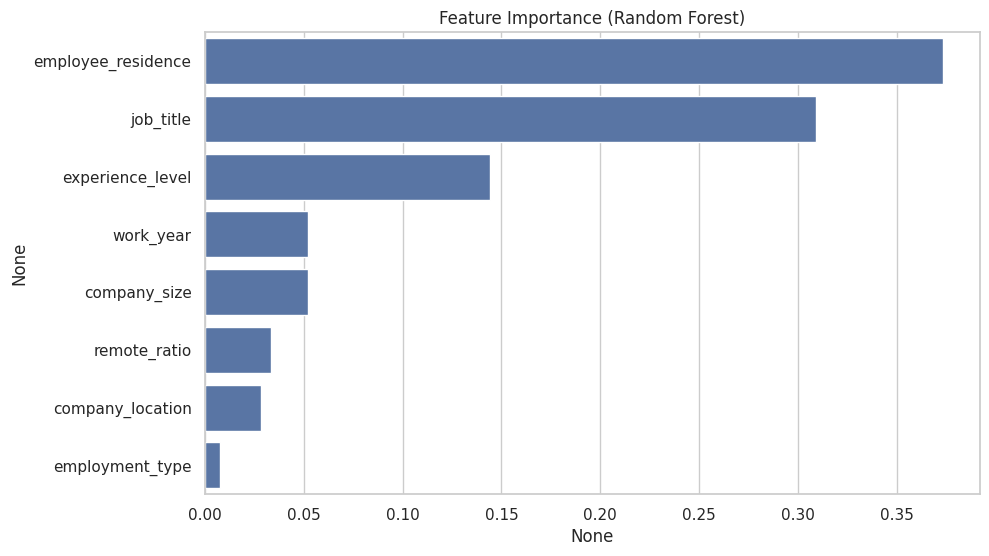

In [ ]:
# 20. Feature Importance
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

### Conclusion
- Random forest has performed better than linear regression.

### Insights
- Data Scientist has the highest number of count followed by Data engineer.
- Russia has the highest average salary followed by US.
- The most common job titles in the Data Science field are Data Scientist, Data Engineer, Data Analyst and Machine Learning Engineer.
- Most Data Science jobs are Full-time positions.